In [179]:
import pandas as pd

In [180]:
happy_df = pd.read_csv("data/happiness.csv")
happy_df = happy_df.rename(columns= {'Country name': 'country', 'Year':'year'})
happy_df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
cols = ['country'] + ["score_"+str(i) for i in range(2011,2017)]
gpi_df = pd.read_csv("data/gpi.csv", skiprows=0, usecols=cols)
gpi_df = pd.melt(gpi_df, id_vars=["country"], var_name="Year", value_name="GPI")
# replace score_ with empty string
gpi_df["Year"] = gpi_df["Year"].str.replace("score_", "")
gpi_df = gpi_df.rename(columns = {'Year':'year'})

gpi_df.to_csv("data/gpiData.csv")
gpi_df = pd.read_csv("data/gpiData.csv")
del gpi_df['Unnamed: 0']

gpi_df.head()

,country,year,GPI
0,Iceland,2011,1.148
1,Denmark,2011,1.289
2,Austria,2011,1.337
3,New Zealand,2011,1.279
4,Portugal,2011,1.453


In [182]:
suicide_df = pd.read_csv("data/suicide.csv")
suicide_df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [183]:
suicide_df = suicide_df.dropna()
suicide_df.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


In [184]:
suicide2011 = suicide_df.loc[suicide_df['year'] == 2011]
suicide2012 = suicide_df.loc[suicide_df['year'] == 2012]
suicide2013 = suicide_df.loc[suicide_df['year'] == 2013]
suicide2014 = suicide_df.loc[suicide_df['year'] == 2014]
suicide2015 = suicide_df.loc[suicide_df['year'] == 2015]
suicide2016 = suicide_df.loc[suicide_df['year'] == 2016]

suicide_range = suicide2011.append(suicide2012)
suicide_range = suicide_range.append(suicide2013)
suicide_range = suicide_range.append(suicide2014)
suicide_range = suicide_range.append(suicide2015)
suicide_range = suicide_range.append(suicide2016)

suicide_range['year'].value_counts()
# suicide_df['year']

2011    1188
2013    1128
2012    1128
2014    1080
2015     840
2016     216
Name: year, dtype: int64

In [185]:
suicide_range = suicide_range.dropna()
suicide_range.head()

,country,year,sex,age,suicides_no,population
1440,Argentina,2011,female,15-24 years,172.0,3372659.0
1441,Argentina,2011,female,25-34 years,102.0,3224774.0
1442,Argentina,2011,female,35-54 years,157.0,4893085.0
1443,Argentina,2011,female,5-14 years,29.0,3472180.0
1444,Argentina,2011,female,55-74 years,93.0,3268753.0


In [186]:
suicide_grouped = suicide_range.groupby(["country", "year"]).sum().reset_index()
suicide_grouped.head()

,country,year,suicides_no,population
0,Antigua and Barbuda,2012,0.0,88703.0
1,Antigua and Barbuda,2013,0.0,89779.0
2,Antigua and Barbuda,2014,0.0,90837.0
3,Antigua and Barbuda,2015,1.0,91889.0
4,Argentina,2011,2912.0,38015739.0


In [187]:
suicide_grouped['rate'] = suicide_grouped['suicides_no']/suicide_grouped['population']

In [188]:
suicide_grouped['per100k'] = suicide_grouped['rate']*100000
suicide_grouped.tail()

,country,year,suicides_no,population,rate,per100k
460,Venezuela (Bolivarian Republic of),2012,731.0,26926228.0,0.000027,2.714825
461,Venezuela (Bolivarian Republic of),2013,618.0,27345912.0,0.000023,2.259936
462,Virgin Islands (USA),2011,8.0,98290.0,0.000081,8.139180
463,Virgin Islands (USA),2012,10.0,98069.0,0.000102,10.196902
464,Virgin Islands (USA),2015,3.0,97951.0,0.000031,3.062756


In [189]:
happy_df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS rou

In [190]:
happy_df = happy_df[['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
                   'Confidence in national government']]
happy_df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Confidence in national government
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.612072
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.611545
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.299357
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.307386
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.435440


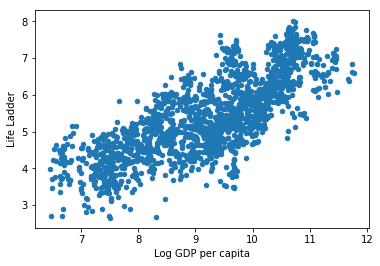

In [191]:
happy_df.plot(x="Log GDP per capita" , y="Life Ladder" , kind="scatter")

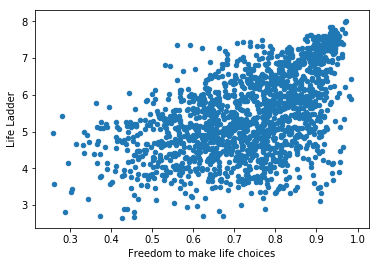

In [192]:
happy_df.plot(x="Freedom to make life choices" , y="Life Ladder" , kind="scatter")

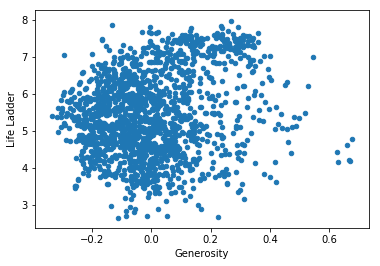

In [193]:
happy_df.plot(x="Generosity" , y="Life Ladder" , kind="scatter")

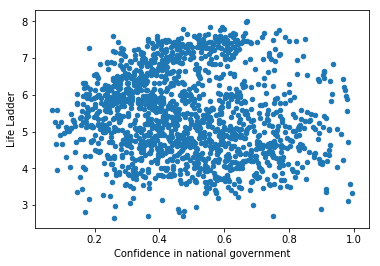

In [194]:
happy_df.plot(x="Confidence in national government" , y="Life Ladder" , kind="scatter")

In [198]:
countries_suicide = suicide_grouped.groupby(['country']).count().reset_index()
countries_happy = happy_df.groupby(['country']).count().reset_index()

compare_countries = countries_suicide.merge(countries_happy, on = 'country', how='outer')
compare_countries = compare_countries.fillna(value='x')

for index,row in compare_countries.iterrows():
    if row['year_x'] != 'x' and row['year_y'] != 'x':
        compare_countries = compare_countries.drop(index)

compare_countries['country']

0                     Antigua and Barbuda
3                                   Aruba
6                                 Bahamas
8                                Barbados
14                      Brunei Darussalam
16                             Cabo Verde
30                                   Fiji
33                          French Guiana
37                                Grenada
38                             Guadeloupe
41                          Hong Kong SAR
44                  Iran (Islamic Rep of)
56                               Maldives
58                             Martinique
60                                Mayotte
73                            Puerto Rico
75                      Republic of Korea
76                    Republic of Moldova
77                                Reunion
78                              Rodrigues
80                     Russian Federation
81                            Saint Lucia
82           Saint Vincent and Grenadines
84                             Sey

In [199]:
for i in range(0,len(happy_df)):
    if happy_df.iloc[i, 0] == 'Hong Kong S.A.R. of China':
        happy_df.iloc[i, 0] = 'Hong Kong SAR'
    if happy_df.iloc[i, 0] == 'United States':
        happy_df.iloc[i, 0] = 'United States of America'
        
for i in range(0,len(suicide_grouped)):
    if suicide_grouped.iloc[i, 0] == 'Iran (Islamic Rep of)':
        suicide_grouped.iloc[i, 0] = 'Iran'
    if suicide_grouped.iloc[i, 0] == 'Republic of Korea':
        suicide_grouped.iloc[i, 0] = 'South Korea'
    if suicide_grouped.iloc[i, 0] == 'Republic of Moldova':
        suicide_grouped.iloc[i, 0] = 'Moldova'
    if suicide_grouped.iloc[i, 0] == 'Russian Federation':
        suicide_grouped.iloc[i, 0] = 'Russia'
    if suicide_grouped.iloc[i, 0] == 'TFYR Macedonia':
        suicide_grouped.iloc[i, 0] = 'Macedonia'
    if suicide_grouped.iloc[i, 0] == 'Venezuela (Bolivarian Republic of)':
        suicide_grouped.iloc[i, 0] = 'Venesuela'

In [200]:
countries_gpi = gpi_df.groupby(['country']).count().reset_index()

compare_countries = countries_suicide.merge(countries_gpi, on = 'country', how='outer')
compare_countries = compare_countries.fillna(value='x')
for index,row in compare_countries.iterrows():
    if row['year_x'] != 'x' and row['year_y'] != 'x':
        compare_countries = compare_countries.drop(index)
        
compare_countries['country']

0                     Antigua and Barbuda
3                                   Aruba
6                                 Bahamas
8                                Barbados
11                                 Belize
14                      Brunei Darussalam
16                             Cabo Verde
30                                   Fiji
33                          French Guiana
37                                Grenada
38                             Guadeloupe
41                          Hong Kong SAR
44                  Iran (Islamic Rep of)
55                             Luxembourg
56                               Maldives
57                                  Malta
58                             Martinique
60                                Mayotte
73                            Puerto Rico
75                      Republic of Korea
76                    Republic of Moldova
77                                Reunion
78                              Rodrigues
80                     Russian Fed

In [201]:
for i in range(0,len(gpi_df)):
    if gpi_df.iloc[i, 0] == 'United States':
        gpi_df.iloc[i, 0] = 'United States of America'

In [202]:
countries_gpi = gpi_df.groupby(['country']).count().reset_index()

compare_countries = countries_happy.merge(countries_gpi, on = 'country', how='outer')
compare_countries = compare_countries.fillna(value='x')
for index,row in compare_countries.iterrows():
    if row['year_x'] != 'x' and row['year_y'] != 'x':
        compare_countries = compare_countries.drop(index)
        
compare_countries['country']

13                               Belize
31                              Comoros
32                  Congo (Brazzaville)
33                     Congo (Kinshasa)
60            Hong Kong S.A.R. of China
86                           Luxembourg
92                                Malta
109                        North Cyprus
113             Palestinian Territories
132                   Somaliland region
139                            Suriname
144            Taiwan Province of China
157                       United States
165    Democratic Republic of the Congo
166                   Equatorial Guinea
167                             Eritrea
168                       Guinea-Bissau
169                         North Korea
170                           Palestine
171                    Papua New Guinea
172               Republic of the Congo
173                              Taiwan
174                         Timor-Leste
175            United States of America
Name: country, dtype: object

In [203]:
for i in range(0,len(happy_df)):
    if happy_df.iloc[i, 0] == 'Congo (Brazzaville)':
        happy_df.iloc[i, 0] = 'Republic of the Congo'
    if happy_df.iloc[i, 0] == 'Congo (Kinshasa)':
        happy_df.iloc[i, 0] = 'Democratic Republic of the Congo'
    if happy_df.iloc[i, 0] == 'Taiwan Province of China':
        happy_df.iloc[i, 0] = 'Taiwan'
    if happy_df.iloc[i, 0] == 'Palestinian Territories':
        happy_df.iloc[i, 0] = 'Palestine'

In [216]:
merge1_df = happy_df.merge(suicide_grouped, on=(['country', 'year']))
merged_df = merge1_df.merge(gpi_df, on=(['country', 'year']))

merged_df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Confidence in national government,suicides_no,population,rate,per100k,GPI
0,Argentina,2011,6.775805,9.884781,0.889073,67.480003,0.815802,-0.170262,0.607538,2912.0,38015739.0,0.000077,7.659985,1.852
1,Argentina,2012,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.418255,3248.0,38441778.0,0.000084,8.449141,1.763
2,Argentina,2013,6.582260,9.877256,0.909874,67.839996,0.737250,-0.126476,0.433749,2987.0,38859125.0,0.000077,7.686740,1.907
3,Argentina,2014,6.671114,9.841482,0.917870,68.019997,0.745058,-0.160449,0.408961,3231.0,39276555.0,0.000082,8.226282,1.789
4,Argentina,2015,6.697131,9.858329,0.926492,68.199997,0.881224,-0.170244,0.378169,3073.0,39699624.0,0.000077,7.740627,1.865


In [ ]:
merged_df.to_csv("data/merged_data.csv")